# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



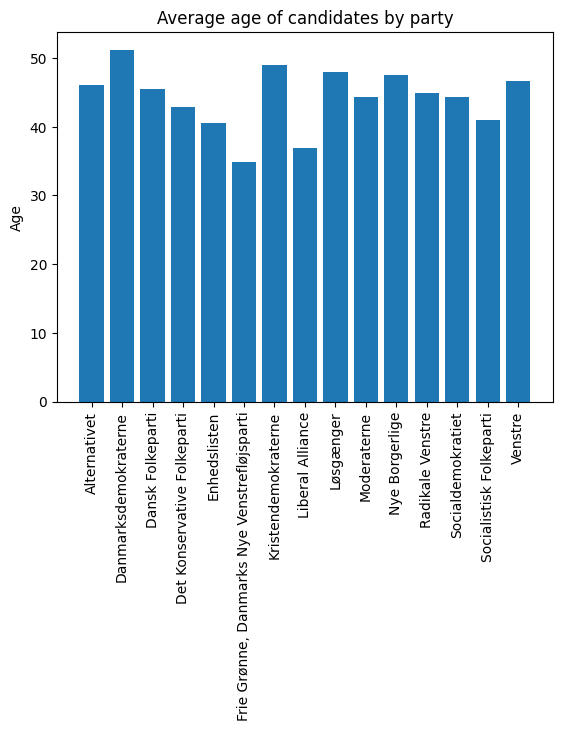

In [85]:
# Age of candidates grouped by parties

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from xlsx file called alldata.xslx
data = pd.read_excel('alldata.xlsx')

# Group by party and calculate the average age
age = data.groupby('parti')['alder'].mean()

# Plot the data
plt.bar(age.index, age)
plt.xticks(rotation=90)
plt.ylabel('Age')
plt.title('Average age of candidates by party')
plt.show()

# On this graph we can see the average age of candidates by party.
# Oldest average age has the Denmarsdemokraterne party
# The youngest is the Venstrefløjensparti

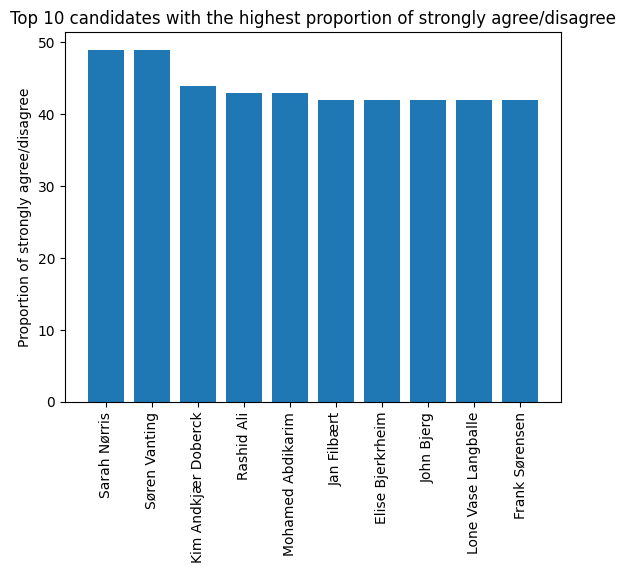

In [86]:
# Read the data from xlsx file called alldata.xslx and remove the following columns: alder, parti, storkreds
data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'parti', 'storkreds'])

# Calculate the proportion of -2 and 2 in each row
data['strongly'] = (data == -2).sum(axis=1) + (data == 2).sum(axis=1)

# Sort the data by the proportion of -2 and 2
data = data.sort_values('strongly', ascending=False)

# plot the top 10 candidates
plt.bar(data['navn'][:10], data['strongly'][:10])
plt.xticks(rotation=90)
plt.ylabel('Proportion of strongly agree/disagree')
plt.title('Top 10 candidates with the highest proportion of strongly agree/disagree')
plt.show()

# On this graph we can see the top 10 candidates with the highest proportion of strongly agree/disagree
# The top 2 beign Sarah Nørris and Søren Vanting

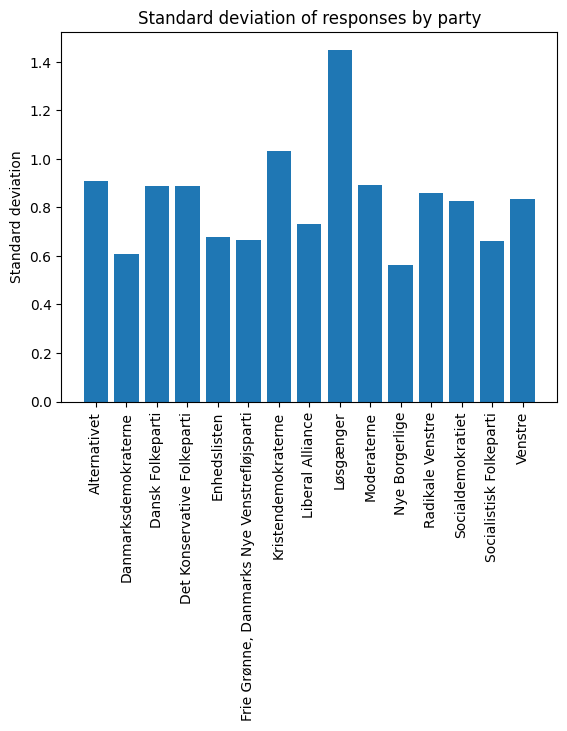

In [87]:
import seaborn as sns

# Read the data from xlsx file called alldata.xslx and remove the following columns: alder, navn, storkreds
data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'navn', 'storkreds'])

# Group by party and calculate the standard deviation of the responses
std = data.groupby('parti').std()

# Plot the data
plt.bar(std.index, std.mean(axis=1))
plt.xticks(rotation=90)
plt.ylabel('Standard deviation')
plt.title('Standard deviation of responses by party')
plt.show()

# The most internal disagreements are in the party Løsgænger
# On the other hand, the most consistent party is the Nye Borgerlige party

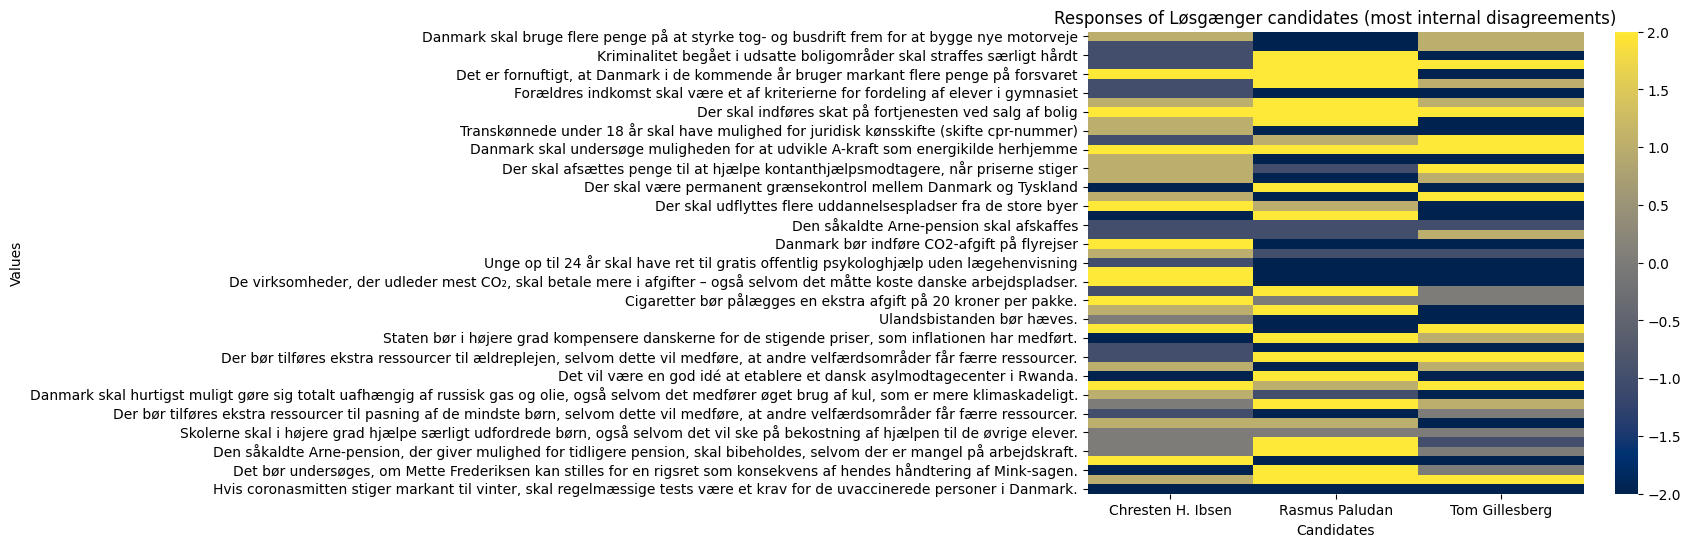

In [88]:
# A heatmap of the responses of the Løsgænger candidates.

data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'storkreds'])
filtered_data = data[data['parti'] == 'Løsgænger']

# Replace question numbers with question names
questionsDr = pd.read_excel('drq.xlsx')
questionsTv2 = pd.read_excel('tv2q.xlsx')

for i in filtered_data.columns:
    if i in questionsDr['ID'].values:
        filtered_data = filtered_data.rename(columns={i: questionsDr[questionsDr['ID'] == i]['Question'].values[0]})
    else:
        if i in questionsTv2['id'].values:
            filtered_data = filtered_data.rename(columns={i: questionsTv2[questionsTv2['id'] == i]['question'].values[0]})

# Select relevant columns for the heatmap, that is all the columns without navn and parti
heatmap_data = filtered_data.drop(columns=['parti'])
grouped_data = heatmap_data.groupby('navn').sum()

# Plot the heatmap, put candidates on x and values on y
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data.T, cmap='cividis', annot=False, fmt='g', vmin=-2, vmax=2)
plt.xlabel('Candidates')
plt.ylabel('Values')
plt.title('Responses of Løsgænger candidates (most internal disagreements)')
plt.show()

# In this heatmap we can see the differences in responses of the candidates from the party Løsgænger
# It is hard to tell if this is really the party with most internal disagreements, as there were only 3 candidates who answered the questions here, where as in Nye Borgerlige there were a lot more so it is a bit weird comparing 2 parties with such a different number of candidates. But it is the data we have se we go for it.

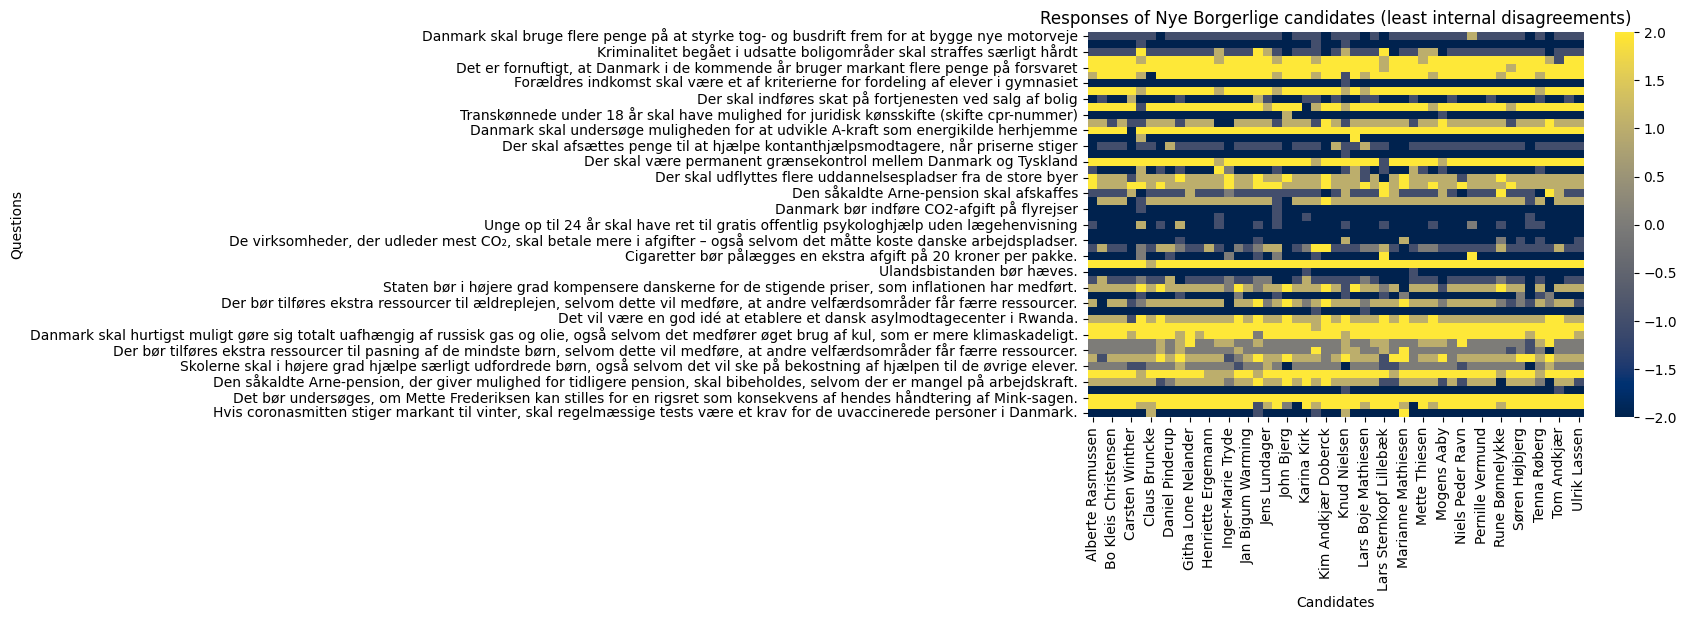

In [89]:
# A heatmap of the responses of the Nye Borgerlige candidates.

data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'storkreds'])
filtered_data = data[data['parti'] == 'Nye Borgerlige']

# Replace question numbers with question names
questionsDr = pd.read_excel('drq.xlsx')
questionsTv2 = pd.read_excel('tv2q.xlsx')

for i in filtered_data.columns:
    if i in questionsDr['ID'].values:
        filtered_data = filtered_data.rename(columns={i: questionsDr[questionsDr['ID'] == i]['Question'].values[0]})
    else:
        if i in questionsTv2['id'].values:
            filtered_data = filtered_data.rename(columns={i: questionsTv2[questionsTv2['id'] == i]['question'].values[0]})


# select relevant columns for the heatmap, that is all the columns without parti
heatmap_data = filtered_data.drop(columns=['parti'])
grouped_data = heatmap_data.groupby('navn').sum()

# Plot the heatmap, put candidates on x and questions on y
plt.figure(figsize=(8, 5))
sns.heatmap(grouped_data.T, cmap='cividis', annot=False, fmt='g', vmin=-2, vmax=2)
plt.xlabel('Candidates')
plt.ylabel('Questions')
plt.title('Responses of Nye Borgerlige candidates (least internal disagreements)')

plt.show()

# In this heatmap we can clearly see more consistence accross the individual answers and that is the reason why Nye Borgerlige is the party with the least internal disagreements.

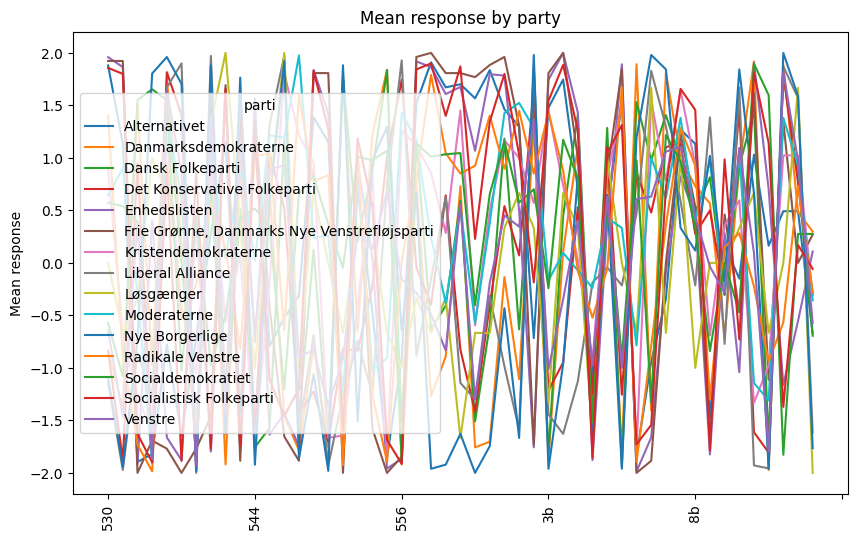

In [90]:
# A plot of parties and their mean respons on every survey question

import matplotlib.pyplot as plt
import numpy as np

#drop irrelevant columns
data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'navn', 'storkreds'])

#group by party and calculate the mean of the responses
mean = data.groupby('parti').mean()

#join drq.xlsx with tv2q.xlsx 
drq = pd.read_excel('drq.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')

def getQuestionNameById(id):
    if(drq['ID'].isin([id]).any()):
        return drq.loc[drq['ID'] == id, 'Question'].values[0]
    else:
        return tv2q.loc[tv2q['id'] == id, 'question'].values[0]

# display(mean)

#plot the data
fig, ax = plt.subplots(figsize=(10, 6))
mean.T.plot(ax=ax)
plt.xticks(rotation=90)
plt.ylabel('Mean response')
plt.title('Mean response by party')
plt.show()


In [91]:
#clean up of data
#in drq.xlsx rename the Title column value, if the value contains KLIMA OG ENERGI, change it to klima

# drq['Title'] = drq['Title'].str.replace('KLIMA OG ENERGI', 'climate')
# drq['Title'] = drq['Title'].str.replace('SUNDHED', 'healthcare')
# drq['Title'] = drq['Title'].str.replace('EU OG UDENRIGS', 'foreign politics')
# drq['Title'] = drq['Title'].str.replace('UDDANNELSE', 'education')
# drq['Title'] = drq['Title'].str.replace('ARBEJDSMARKED OG ØKONOMI', 'economy')

# #the same for tv2q.xlsx
# tv2q['header'] = tv2q['header'].str.replace('Miljø og klima', 'climate')
# tv2q['header'] = tv2q['header'].str.replace('Hospitaler og sundhed', 'healthcare')
# tv2q['header'] = tv2q['header'].str.replace('Udenrigs- og forsvarspolitik', 'foreign politics')
# tv2q['header'] = tv2q['header'].str.replace('Skole og uddannelse', 'education')
# tv2q['header'] = tv2q['header'].str.replace('Økonomi', 'economy')

##picovina

The process below shows the implementation and tuning of a Single Decision Tree, Random Forrest, and Gradient Boosted Tree.

Single Decision Tree Before Pre-Pruning Training Accuracy: 1.0
Single Decision Tree Before Pre-Pruning Test Accuracy: 0.7586206896551724


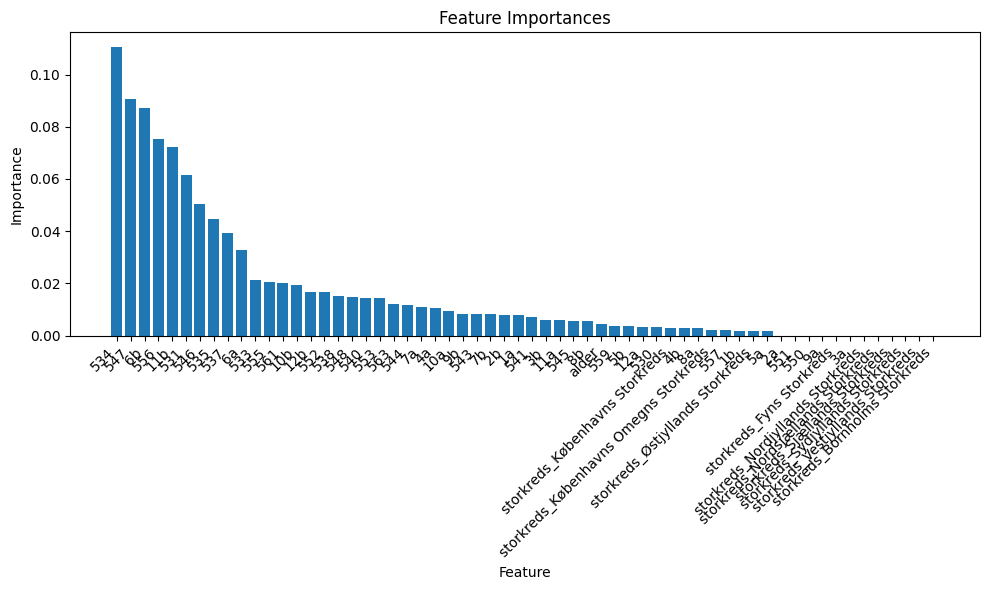

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to plot feature importances to reduce code duplication
def plot_feature_importances(model, feature_names, figsize=(10, 6)):
    """
    Plot feature importances for a given model.

    Parameters:
    - model: The trained machine learning model
    - feature_names: List of feature names
    - figsize: Tuple specifying the figure size (default is (10, 6))
    """
    # Get feature importances from the model
    importances = model.feature_importances_

    # Create a DataFrame to store feature names and their importances
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plot feature importances as a bar chart
    plt.figure(figsize=figsize)
    plt.bar(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return feature_importances

# Example Usage:
# plot_feature_importances(best_rf_model, X.columns)

# Load data from your excel file
df = pd.read_excel("alldata.xlsx")

# Separate the target variable
y = df['parti']

# Drop the original 'navn' and 'parti' columns
X = df.drop(columns=['navn', 'parti'], axis=1)

# Convert all feature names to strings
X.columns = X.columns.astype(str)

# One-hot encode categorical variables
X = pd.get_dummies(X)
# print(X.dtypes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model_v1 = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model_v1.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model_v1.predict(X_train)

# Make predictions on the test set
test_predictions = model_v1.predict(X_test)

# Evaluate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Single Decision Tree Before Pre-Pruning Training Accuracy: {train_accuracy}")

# Evaluate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Single Decision Tree Before Pre-Pruning Test Accuracy: {test_accuracy}")

# Feature importances
importances_decision_tree_v1 =  plot_feature_importances(model_v1, X.columns)




The first version of the model is very clearly overfitting with the accuracy of 100% on the train set. It also uses the storkreds feature that seems to have zero importance (as expected). We can adjust the hyperparameters and remove unneccessary features to improve the model.

Single Decision Tree After Pre-Pruning Training Accuracy: 0.7532467532467533
Single Decision Tree After Pre-Pruning Test Accuracy: 0.7413793103448276


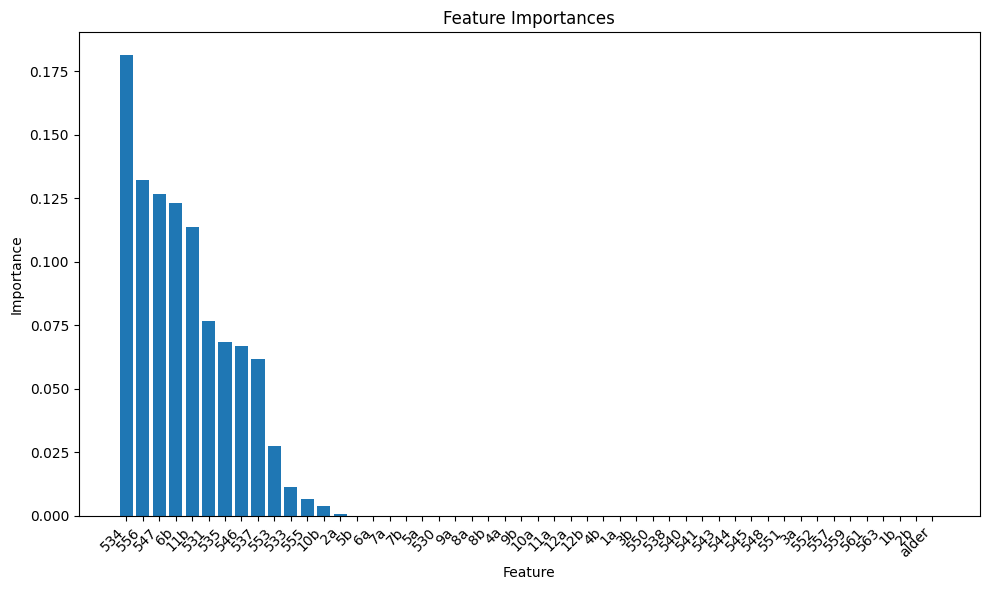

In [93]:

# Separate the target variable
y = df['parti']

# Drop the original 'navn' and 'parti' columns
X = df.drop(columns=['navn', 'parti', 'storkreds'], axis=1)

# Convert all feature names to strings
X.columns = X.columns.astype(str)

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model_v2 = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,             # The maximum depth of the tree. It limits the number of nodes in the longest path from the root to a leaf.
    min_samples_split=6,     # The minimum number of samples required to split an internal node.
    min_samples_leaf=7       # The minimum number of samples required to be at a leaf node.
)

# Train the model on the training set
model_v2.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model_v2.predict(X_train)

# Make predictions on the test set
test_predictions = model_v2.predict(X_test)

# Evaluate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Single Decision Tree After Pre-Pruning Training Accuracy: {train_accuracy}")

# Evaluate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Single Decision Tree After Pre-Pruning Test Accuracy: {test_accuracy}")

# Feature importances
importances_decision_tree_v2 = plot_feature_importances(model_v2, X.columns)


After manually tuning the hyperparameters and removing storkreds feature, the model's performance has improved compared to the previous version - the gap in accuracy between the train and test data has been reduced from 24.7% to 1.2%. However, the accuracy is only around 75%. 
The bar graph containing the importance of each feature shows that some of them have a much bigger weight than the others, most likely due to limiting the depth of the tree.

Random Forest Training Accuracy: 0.9696969696969697
Random Forest Test Accuracy: 0.9482758620689655


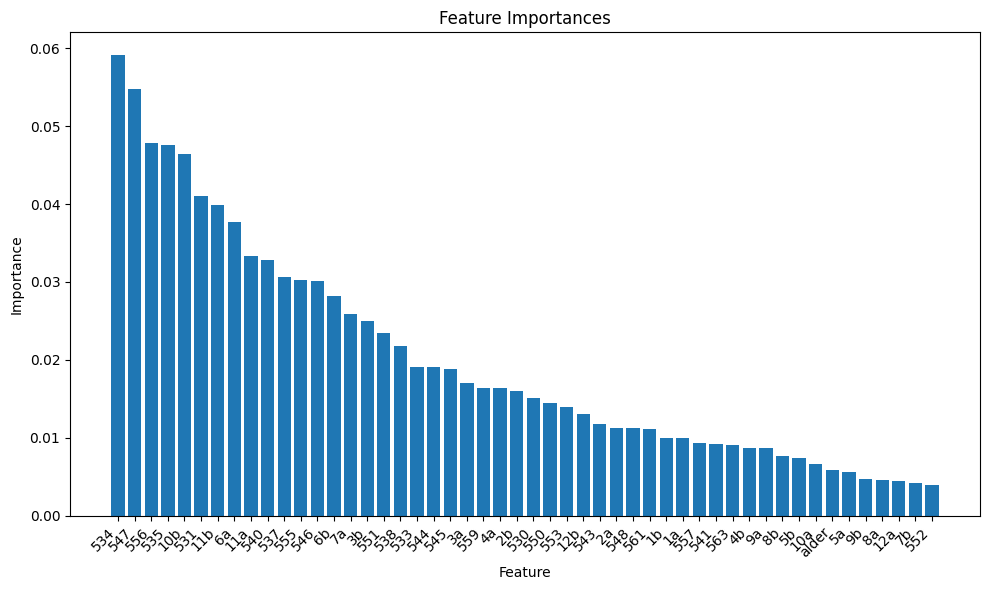

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_v3 = RandomForestClassifier(
    random_state=42,
    n_estimators=150,         # The number of trees in the forest.
    max_depth=6,              # The maximum depth of the tree. It limits the number of nodes in the longest path from the root to a leaf.
    min_samples_split=2,      # The minimum number of samples required to split an internal node.
    min_samples_leaf=2        # The minimum number of samples required to be at a leaf node.
)

# Train the Random Forest model on the training set
model_v3.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = model_v3.predict(X_test)
train_predictions = model_v3.predict(X_train)

# Evaluate the accuracy of the Random Forest model on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Random Forest Training Accuracy: {train_accuracy}")

# Evaluate the accuracy of the Random Forest model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Random Forest Test Accuracy: {test_accuracy}")

# Feature importances
importances_random_forest = plot_feature_importances(model_v3, X.columns)

Implementing Random Forrest model increased the training accuracy to 96.9% while keeping the test accuracy just 2.1% below at 94.8%. When multiple trees are used to build the model, each of the features has a non-zero importance. The code block below shows that the search for the ideal combination of the hyperparameters can be automated - a parameter grid is defined and the GridSearchCV library performs a search across all possible combinations to find the combination with the best performance, in this case with the best accuracy. This way of finding the best parameters is, however, very computationally demanding. 

In [95]:

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [5, 8, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)



Gradient Boosted Tree Training Accuracy: 0.9855699855699855
Gradient Boosted Tree Test Accuracy: 0.8908045977011494


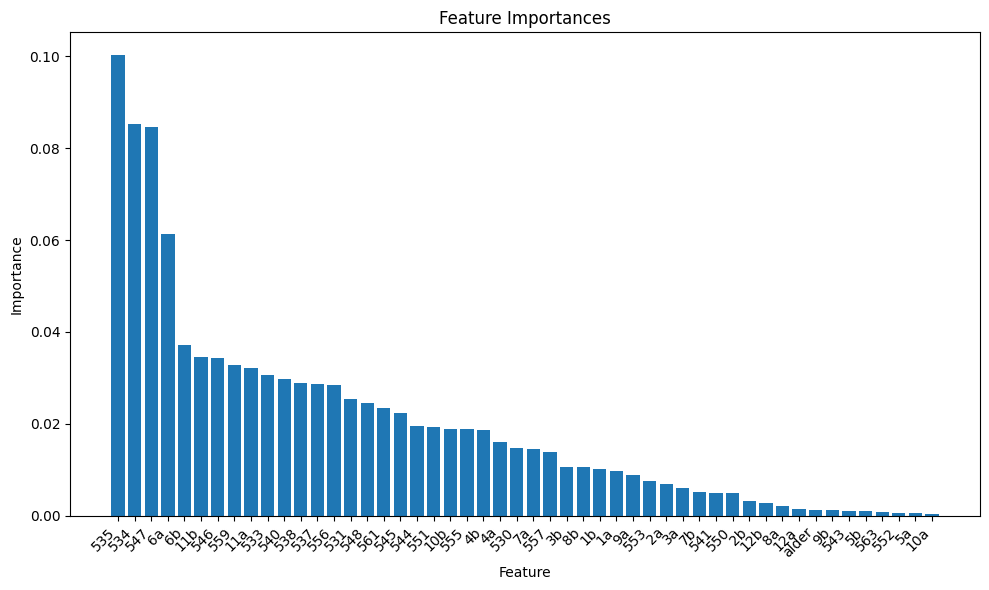

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
model_v4 = GradientBoostingClassifier(
    random_state=42,
    n_estimators=70,            # The number of boosting stages to be run
    learning_rate=0.05,         # Weight given to each tree
    max_depth=2                 # The maximum depth of the individual trees
)

# Train the model on the training set
model_v4.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model_v4.predict(X_train)

# Make predictions on the test set
test_predictions = model_v4.predict(X_test)

# Evaluate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Gradient Boosted Tree Training Accuracy: {train_accuracy}")

# Evaluate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Gradient Boosted Tree Test Accuracy: {test_accuracy}")

# Feature importances
importances_boosted_tree = plot_feature_importances(model_v4, X.columns)

The gradient boosted tree model proved to be a disappointment, even after extensive manual tuning, the model is consitently overfitting at almost 100% train accuracy with the test accuracy around 10% below that. 

In conclusion, the Random Forrest model was by far the best one so far with great accuracy and consistency between train and test data results. The feature importance was monitored throughout the different versions of the models to show the development. Although the distribution of the importances changed, some of the questions kept showing up in the graph as the most influential, they are listed below: 
* 534   EU OG UDENRIGS  På sigt skal Danmark meldes ud af EU (In the long run, Denmark must withdraw from the EU)
* 547	DEMOKRATI	Der bør dannes en regering hen over midten (A government should be formed across the middle)
* 535	EU OG UDENRIGS	Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret (It makes sense for Denmark to spend significantly more money on defense in the coming years)
* 556	ARBEJDSMARKED OG ØKONOMI	Den såkaldte Arne-pension skal afskaffes (The so-called Arne pension must be abolished)
* 11b	Mink-sagen	Det bør undersøges, om Mette Frederiksen kan stilles for en rigsret som konsekvens af hendes håndtering af Mink-sagen. (It should be investigated whether Mette Frederiksen can be impeached as a consequence of her handling of the Mink case.)

This makes sense, as the opinions on these matters differes wildly between parties on different sides of the spectrum and therefore have bigger weight in predicting the affiliation to a party. 



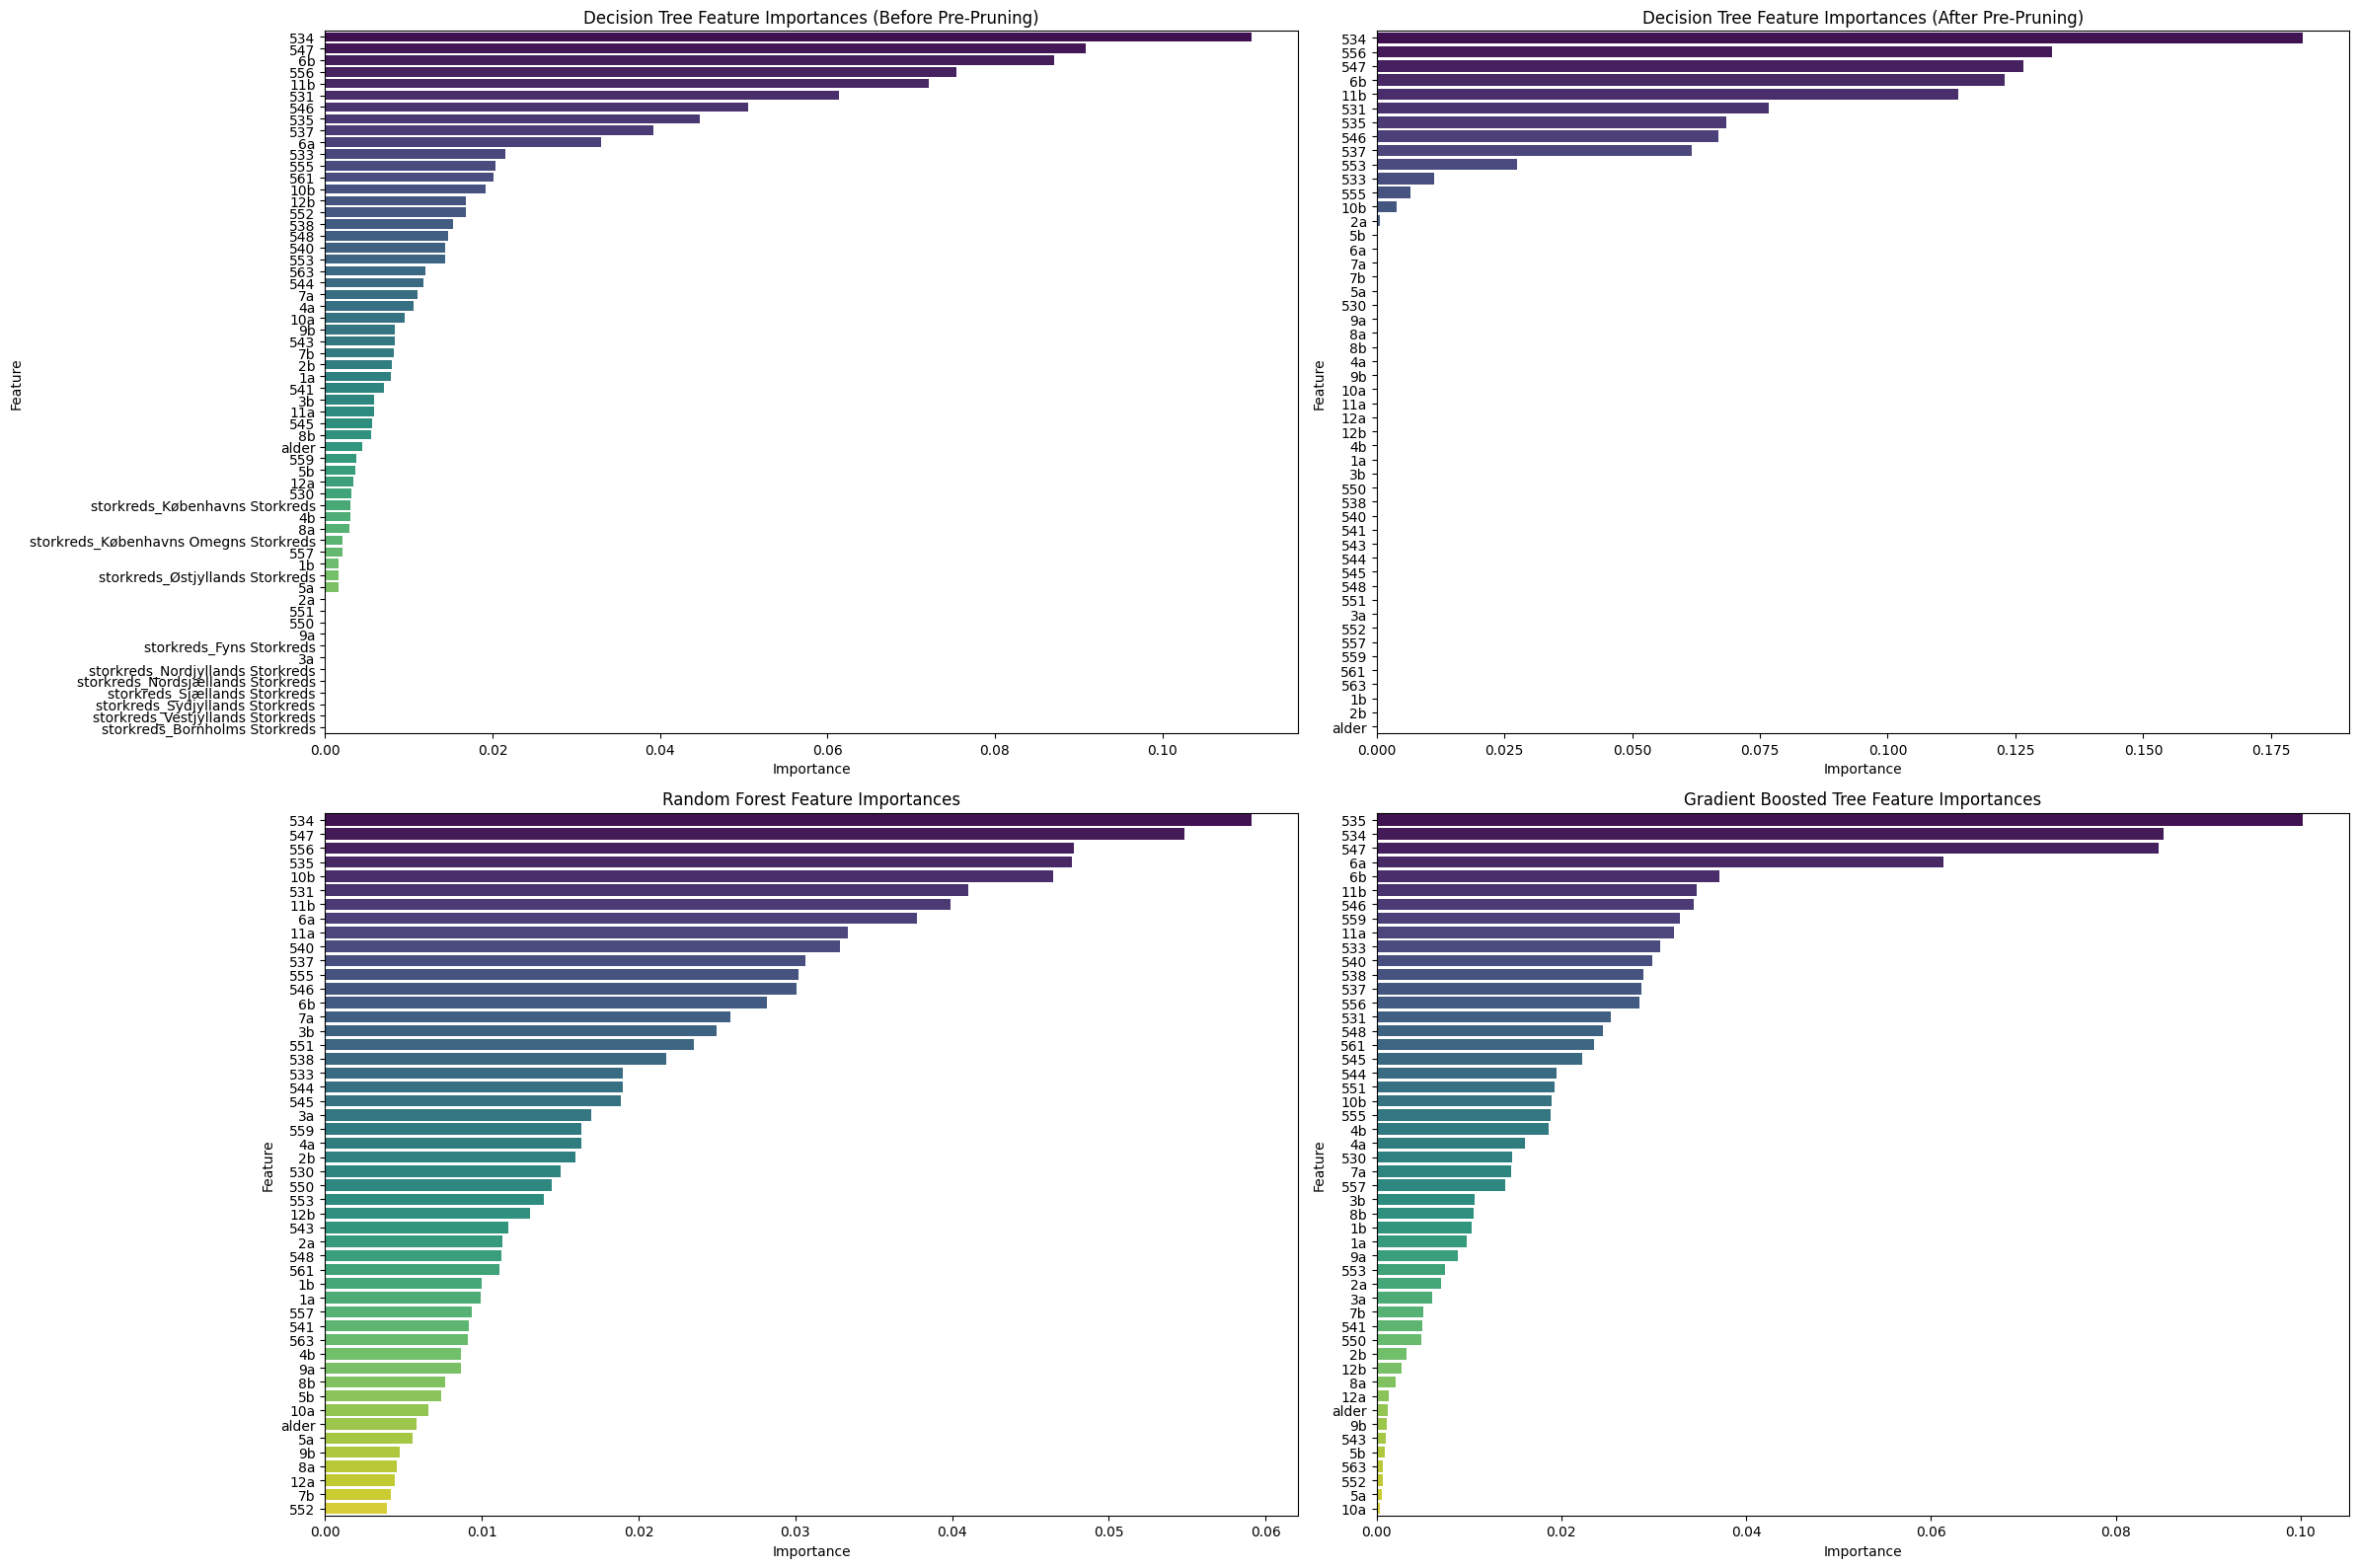

In [97]:
import seaborn as sns
questions_dr = pd.read_excel('drq.xlsx')
question_mapping = dict(zip(questions_dr['ID'], questions_dr['Question']))

# Plot feature importances as a bar chart
plt.figure(figsize=(24, 16))

# Decision Tree (Before Pre-Pruning)
plt.subplot(2, 2, 1)
sns.barplot(x='Importance', y='Feature', data=importances_decision_tree_v1, hue='Feature', palette="viridis", legend=False)
plt.title('Decision Tree Feature Importances (Before Pre-Pruning)')

# Decision Tree (After Pre-Pruning)
plt.subplot(2, 2, 2)
sns.barplot(x='Importance', y='Feature', data=importances_decision_tree_v2, hue='Feature', palette="viridis", legend=False)
plt.title('Decision Tree Feature Importances (After Pre-Pruning)')

# Random Forest
plt.subplot(2, 2, 3)
sns.barplot(x='Importance', y='Feature', data=importances_random_forest, hue='Feature', palette="viridis", legend=False)
plt.title('Random Forest Feature Importances')

# Gradient Boosted Tree
plt.subplot(2, 2, 4)
sns.barplot(x='Importance', y='Feature', data=importances_boosted_tree, hue='Feature', palette="viridis", legend=False)
plt.title('Gradient Boosted Tree Feature Importances')

plt.tight_layout()
plt.show()
